In [1]:
from dataloader import Dataset, create_dataloader

c:\Users\CITY3\.conda\envs\i-jepaVENV\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
from torchvision.transforms import Compose, Resize, Normalize, ToTensor, RandomResizedCrop

# Define transformations
transforms = Compose([
    RandomResizedCrop(size=(256, 256), scale=(0.1, 0.2)),
    # Resize((256, 256)), # Resize images
    # ToTensor(), # Convert images to tensors
    # Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # Normalize images
])

# Create the dataset
# dataset = Dataset(directory=directory, transform=transforms)


In [32]:
directory = r"D:\omer\poverty_mapping_data\clipped_data"

# Create the DataLoader
dataloader = create_dataloader(directory, batch_size=4, transform=transforms)


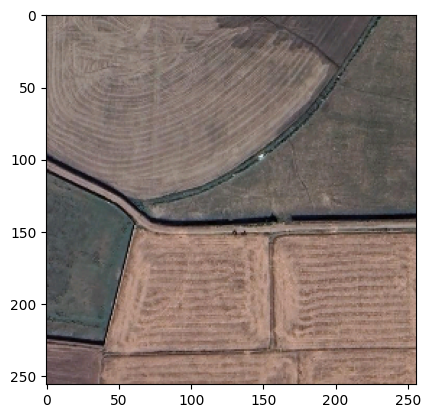

Label: 2


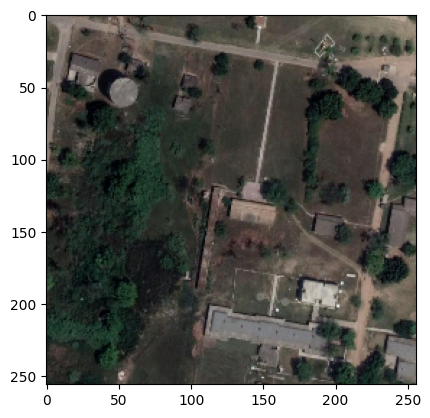

Label: 0


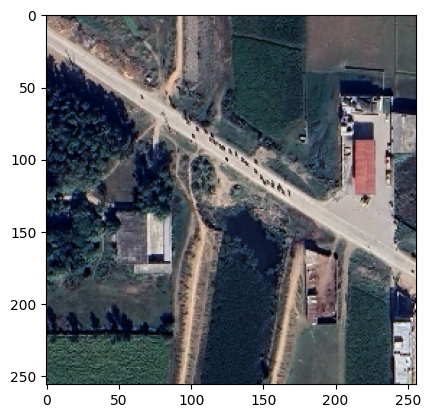

Label: 2


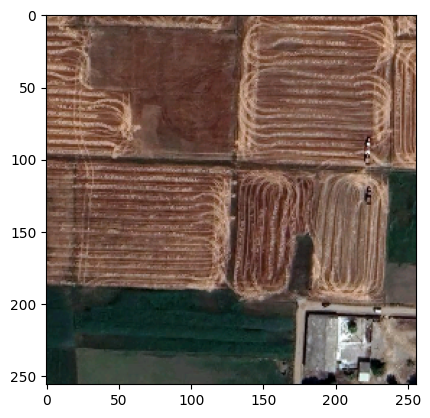

Label: 1


In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Function to convert a torch.Tensor to numpy for plotting
def imshow(img):
    img = img.numpy().transpose((1, 2, 0))  # Convert from torch [C, H, W] to numpy [H, W, C]
    mean = np.array([0.485, 0.456, 0.406])  # These values should match your normalization values
    std = np.array([0.229, 0.224, 0.225])   # These values should match your normalization values
    # img = std * img + mean                   # Unnormalize
    # img = np.clip(img, 0, 1)                # Clip values to [0, 1] range
    plt.imshow(img)
    plt.show()

for images, labels in dataloader:
    for i in range(len(images)):
        imshow(images[i])
        print("Label:", labels[i].item())
        
    break  


In [38]:
## class distribution

from collections import defaultdict
import os

def count_class_labels(directory):
    """
    Counts the number of instances for each class label in a given directory.

    Args:
        directory (str): The directory containing the image files.

    Returns:
        dict: A dictionary with class labels as keys and counts as values.
    """
    # Initialize a dictionary to hold the counts for each class label
    label_counts = defaultdict(int)

    # List all files in the given directory
    files = [f for f in os.listdir(directory) if f.endswith('.tif')]

    # Loop through each file, extract the class label, and update the count
    for file_name in files:
        # Assuming class label is the first element in the file name, separated by a comma
        class_label = int(file_name.split(',')[0].strip('('))
        label_counts[class_label] += 1

    return label_counts
count_class_labels(directory)


defaultdict(int, {0: 307, 1: 1475, 2: 610})